# Fandango Rating Dillemma

The project will be based on the Fandango movie rating system. Over the last few years there have been reported discrepencies between the overall rating given to a movie and the combined actual user rating on the site.
The aim of this analysis will be to detect the difference between the two scores in order to see if the writers of this website have been updating the scores.

We will read into two fandango dataframes. One was collected by Walt Hickey, who concluded that the website was inflating movie scores, lacking consideration for the true scores users have reported. The other set of data will consist of more recent collection of Fandango scores. We will analyze and compare the two and draw conclusions from there.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.options.display.max_columns = 100
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

In [2]:
hickey_fan = pd.read_csv('fandango_score_comparison.csv')
dataquest_fandango = pd.read_csv('movie_ratings_16_17.csv')

In [3]:
hickey = hickey_fan[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']]
dataquest = dataquest_fandango[['movie','year','fandango']]

In [4]:
print(hickey.head())
print("\n")
print(dataquest.head())

                             FILM  Fandango_Stars  Fandango_Ratingvalue  \
0  Avengers: Age of Ultron (2015)  5.0             4.5                    
1  Cinderella (2015)               5.0             4.5                    
2  Ant-Man (2015)                  5.0             4.5                    
3  Do You Believe? (2015)          5.0             4.5                    
4  Hot Tub Time Machine 2 (2015)   3.5             3.0                    

   Fandango_votes  Fandango_Difference  
0  14846           0.5                  
1  12640           0.5                  
2  12055           0.5                  
3  1793            0.5                  
4  1021            0.5                  


                     movie  year  fandango
0  10 Cloverfield Lane      2016  3.5     
1  13 Hours                 2016  4.5     
2  A Cure for Wellness      2016  3.0     
3  A Dog's Purpose          2017  4.5     
4  A Hologram for the King  2016  3.0     


After isolating the variables of interest for our study, we can determine the population to be all the movies that were rated on the fandango website. 

## Sampling

Hickey_fandango:

- This sample consisted of every film that has a RT (Rotten Tomatoes) rating, a Metacritic score, and IMDb score. In addition, the movie must have had at least 30 fan reviews on Fandango. This particular sample collected for all the values that perceded August 24th, 2015.

- The sample collected by Walt Hickey cannot be considered random as it is bound by various constraints that would otherwise remove several entries from the population dataset. 

- The sample is not representative of the total population due to the factors listed above.


Dataquest_fandango:

- Sample of this dataset contains 214 of the most popular movies (released in 2016 and 2017). The movies must have had reviews as of March 22, 2017. 

- This dataset does not have a random sample either. Any movie that does not meet the criteria will be excluded from the sample. So we can state that these two samples might have been useful for their analysts' research. Yet, we will not consider them helpful for our analysis. It is therefore necessary for us to change the goal of our analysis by placing some limitations to it. In this way, the samples will become more representative.

# New Goal

Due to the nature of our previous datasets lacking randomness and not proving to be representative of the overall population, we change our anaylsis goal to better fit the sampling criteria. We will take a generalized approach to analyzing the two new samples:

1. All Fandango's ratings for popular movies released in 2015.
2. All Fandango's ratings for popular movies released in 2016.

The term "Popular" will attribute the movies that received at least 30 user ratings.

## Isolating the Samples We Need

In [5]:
print((hickey['Fandango_votes'] > 30).sum())
print("\n")
hickey.info()

# we see that all entries in the dataset "hickey_fandango" have at least 30 votes. Therefore can be deemed "popular".

146


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 5 columns):
FILM                    146 non-null object
Fandango_Stars          146 non-null float64
Fandango_Ratingvalue    146 non-null float64
Fandango_votes          146 non-null int64
Fandango_Difference     146 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 5.8+ KB


In [6]:
dataquest_fandango.info()
print("\n")
print(dataquest_fandango.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 15 columns):
movie           214 non-null object
year            214 non-null int64
metascore       214 non-null int64
imdb            214 non-null float64
tmeter          214 non-null int64
audience        214 non-null int64
fandango        214 non-null float64
n_metascore     214 non-null float64
n_imdb          214 non-null float64
n_tmeter        214 non-null float64
n_audience      214 non-null float64
nr_metascore    214 non-null float64
nr_imdb         214 non-null float64
nr_tmeter       214 non-null float64
nr_audience     214 non-null float64
dtypes: float64(10), int64(4), object(1)
memory usage: 25.2+ KB


                     movie  year  metascore  imdb  tmeter  audience  fandango  \
0  10 Cloverfield Lane      2016  76         7.2   90      79        3.5        
1  13 Hours                 2016  48         7.3   50      83        4.5        
2  A Cure for Wellness      2016  47    

For the dataset related to Walt Hickey's findings, we are able to determine that all entries in the table are for movies rated by over 30 people. Knowing this, the first sample contains "popular" movies. The more recent dataset however, does not provide information on the number of voters with respect to the Fandango ratings. In order to overcome this, we will conduct the following:

1. Select at random a sample of 10 entries in the "Dataquest" set - Using random_state = 1

2. Using the output of movies, check the Fandango website to verify the number of ratings for each. That way we determine if our random sample is representative.

In [7]:
dataquest.sample(10, random_state = 1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


90% of the movies in our sample are popular. This is enough for us to move forward with a bit more confidence.


## Isolating Entries for 2015 and 2016

In [8]:
hickey['Year'] = hickey['FILM'].str[-5:-1]
print(hickey.head())
# We use string indexing to slice the year out of the movie title and create a new column 'Year'

                             FILM  Fandango_Stars  Fandango_Ratingvalue  \
0  Avengers: Age of Ultron (2015)  5.0             4.5                    
1  Cinderella (2015)               5.0             4.5                    
2  Ant-Man (2015)                  5.0             4.5                    
3  Do You Believe? (2015)          5.0             4.5                    
4  Hot Tub Time Machine 2 (2015)   3.5             3.0                    

   Fandango_votes  Fandango_Difference  Year  
0  14846           0.5                  2015  
1  12640           0.5                  2015  
2  12055           0.5                  2015  
3  1793            0.5                  2015  
4  1021            0.5                  2015  


/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [9]:
hickey['Year'].value_counts()

2015    129
2014    17 
Name: Year, dtype: int64

In [10]:
fandango_2015 = hickey[hickey['Year'] == '2015']
fandango_2015.head() # Formatted the hickey dataset to only include movies for the year 2015.

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015


In [11]:
dataquest['year'].value_counts()

2016    191
2017    23 
Name: year, dtype: int64

In [12]:
fandango_2016 = dataquest[dataquest['year'] == 2016] # isolating for the fandango movie ratings of 2016
fandango_2016.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
4,A Hologram for the King,2016,3.0
5,A Monster Calls,2016,4.0


## Comparing Distribution Shapes for 2015 and 2016

After all these preliminary steps, we can now start analyzing the two samples we isolated before. Once again, our goal is to determine whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016.

There are many ways we can go about with our analysis, but let's start simple with making a high-level comparison between the shapes of the distributions of movie ratings for both samples.

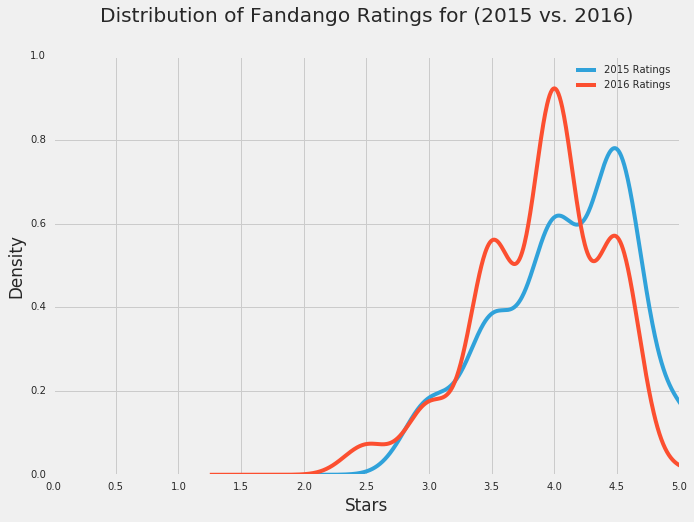

In [13]:
plt.style.use('fivethirtyeight')
from numpy import arange

fandango_2015['Fandango_Stars'].plot.kde(label = '2015 Ratings', legend = True, figsize = (10,7))
fandango_2016['fandango'].plot.kde(label = '2016 Ratings', legend = True)

plt.title('Distribution of Fandango Ratings for (2015 vs. 2016)', y = 1.07)
plt.xlabel('Stars')
plt.xlim(0,5) # because ratings start at 0 and end at 5
plt.xticks(arange(0,5.1,.5))
plt.show()


The density plot for both years is 'skewed to the left' with respect to the range of stars on the x-axis. Moreover, the concentration of Stars to the right indicates that movies from both years more often than not receive higher score (range 3.5 - 5). The 2016 distribution is slightly shifted to the left compared to the 2015 one.

The distribution of 2015 scores has a minor but evident concentration of movies with higher ratings compared with the 2016 graph. This proves to us the overall premise of the study where previous (2015) movies were given ratings that were otherwise seen as inflated. Furthermore, looking at the newer datatset compiled by the team at 'dataquest', the highest density of was for movies with 4.0 stars. In comaprison, that number was roughly 4.5 in 2015. 



## Comparing Relative Frequencies

In [21]:
print('2015' + '\n' + '-' * 16)
print(fandango_2015['Fandango_Stars'].value_counts(normalize = True).sort_index() * 100)
# ^ percent of movies with the reseptive number of fandango stars.
print('\n')
print('\n')
print('\n')
print('2016' + '\n' + '-' * 16)
fandango_2016['fandango'].value_counts(normalize = True).sort_index() * 100

2015
----------------
3.0    8.527132 
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0    6.976744 
Name: Fandango_Stars, dtype: float64






2016
----------------


2.5    3.141361 
3.0    7.329843 
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0    0.523560 
Name: fandango, dtype: float64

In [25]:
print(len(fandango_2015))
print('\n')
print(len(fandango_2016))

129


191


The Fandango ratings for 2015 and 2016 movies display varying distribtions with respect to one another. In 2015, the largest number of movies received 4.0 or 4.5 stars. Moreover, these two scores accounted for roughly 66.7% of the total. In comparison, the 2016 movies were given lower scores on the higher end of the distribution. Morevoer, the percent of movies rated 5 was 0.52% in 2016 while it was roughly 7% in 2015

The minimum rating in 2016 (2.5) is also lower than in 2015 (3.0). Additionally, the 2015 movies received the largest number of 4.5 votes, while for 2016 it was 4.0 at 40% of movies. 

For some other ratings, the percentage went up in 2016. There was a greater percentage of movies in 2016 that received 3.5 and 4 stars, compared to 2015. 3.5 and 4.0 are high ratings, and this challenges the direction of the change we saw on the kernel density plots.

By using percentages rather than proportions we can bypass the problem of one data set containing more entries than the other.

## Determining the Direction of the Change

We confirmed with the two tables before that there is indeed a clear difference between the two distributions. However, the direction of the difference is not as clear as it was on the kernel density plots.

We'll take a couple of summary statistics (remember the distinction between sample statistics and population parameters) to get a more precise picture about the direction of the difference. We'll take each distribution of movie ratings and compute its mean, median, and mode, and then compare these statistics to determine what they tell about the direction of the difference.

In [29]:
mean_2015 = fandango_2015['Fandango_Stars'].mean()
mean_2016 = fandango_2016['fandango'].mean()

median_2015 = fandango_2015['Fandango_Stars'].median()
median_2016 = fandango_2016['fandango'].median()

mode_2015 = fandango_2015['Fandango_Stars'].mode()[0]
mode_2016 = fandango_2016['fandango'].mode()[0]


summary = pd.DataFrame()
summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
summary.index = ['mean', 'median', 'mode']
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


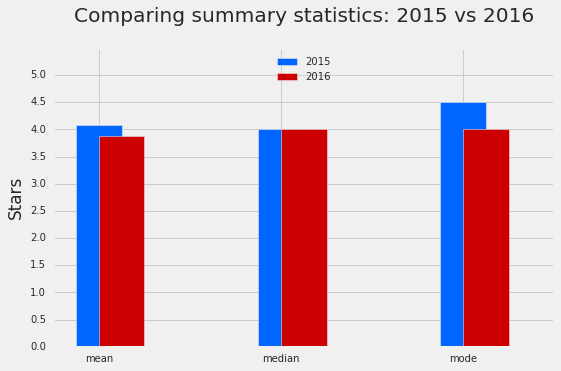

In [30]:
plt.style.use('fivethirtyeight')
summary['2015'].plot.bar(color = '#0066FF', align = 'center', label = '2015', width = .25)
summary['2016'].plot.bar(color = '#CC0000', align = 'edge', label = '2016', width = .25,
                         rot = 0, figsize = (8,5))

plt.title('Comparing summary statistics: 2015 vs 2016', y = 1.07)
plt.ylim(0,5.5)
plt.yticks(arange(0,5.1,.5))
plt.ylabel('Stars')
plt.legend(framealpha = 0, loc = 'upper center')
plt.show()

The mean and mode were lower in 2016. This was evident as the overall movie rating drop was imminent.

## Conclusion

Our investigation revealed that there is in fact a little variation between Fandango's rankings for well-liked films in 2015 and those in 2016. Also, we discovered that popular films released in 2016 had lower Fandango ratings on average than popular films released in 2015.

While the exact reason of the shift cannot be determined, there is a very good possibility that Fandango's implementation of Hickey's research led to the correction of the biased rating system.